## <p style="background-color:#068FFF; color:white; font-family:monospace; font-size:200%; text-align:center; border-radius: 5px 20px;padding:10px">ML Model to predict Housing Prices in California</p>

#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">Loading Libraries:</p>

In [1]:
# EDA Libraries
import numpy as np #linear algebra
import pandas as pd #data preprocessing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
%matplotlib inline

# Sampling Libraries
from sklearn.model_selection import train_test_split

# Data Transformation Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Custom Transformation
from sklearn.base import BaseEstimator, TransformerMixin

# Data Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning Models and Evaluation Metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">About Dataset:</p>

<p style="text-align:left; font-family:newtimeroman;padding-left:10px;padding-right:10px;font-size:110%;margin:0px">The dataset serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables.</p>
<p style="padding:0px;margin:10px"></p>
<p style="text-align:left; font-family:newtimeroman;padding-left:10px;padding-right:10px;font-size:110%;margin:0px">The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required!</p>

#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">Loading Dataset:</p>

In [2]:
# loading data
def get_data(dataset_name):
    return pd.read_csv(dataset_name)

In [3]:
# Storing the data
housing=get_data("housing.csv")

#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">Overview of Data:</p>

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.head()

# features --> longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
# target --> median_house_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">Exploratory Data Analysis:</p>

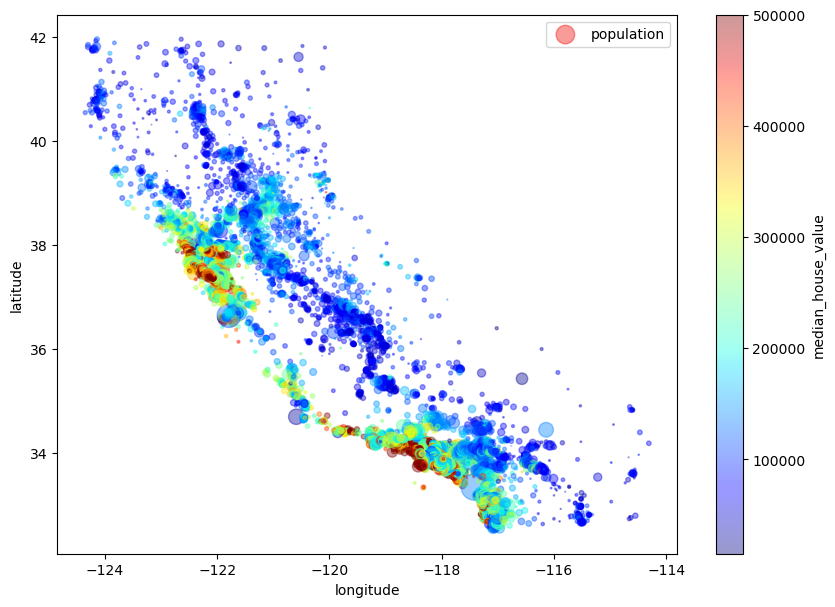

In [6]:
# Visualizing Geographical Data
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing['population']/100, label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

<p style="text-align:left; font-family:newtimeroman;padding-left:10px;padding-right:10px;font-size:110%;margin:0px">The latitude and longitude features helped us to create a plot similiar to that of the map of California.The plot tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density.</p>
<p style="padding:0px;margin:10px"></p>
<p style="text-align:left; font-family:newtimeroman;padding-left:10px;padding-right:10px;font-size:110%;margin:0px">The coastal cities (San Fransisco, Los Angeles) have the more poopulation along with an increase in the house values compared to the inland areas (like Sacramento).</p>

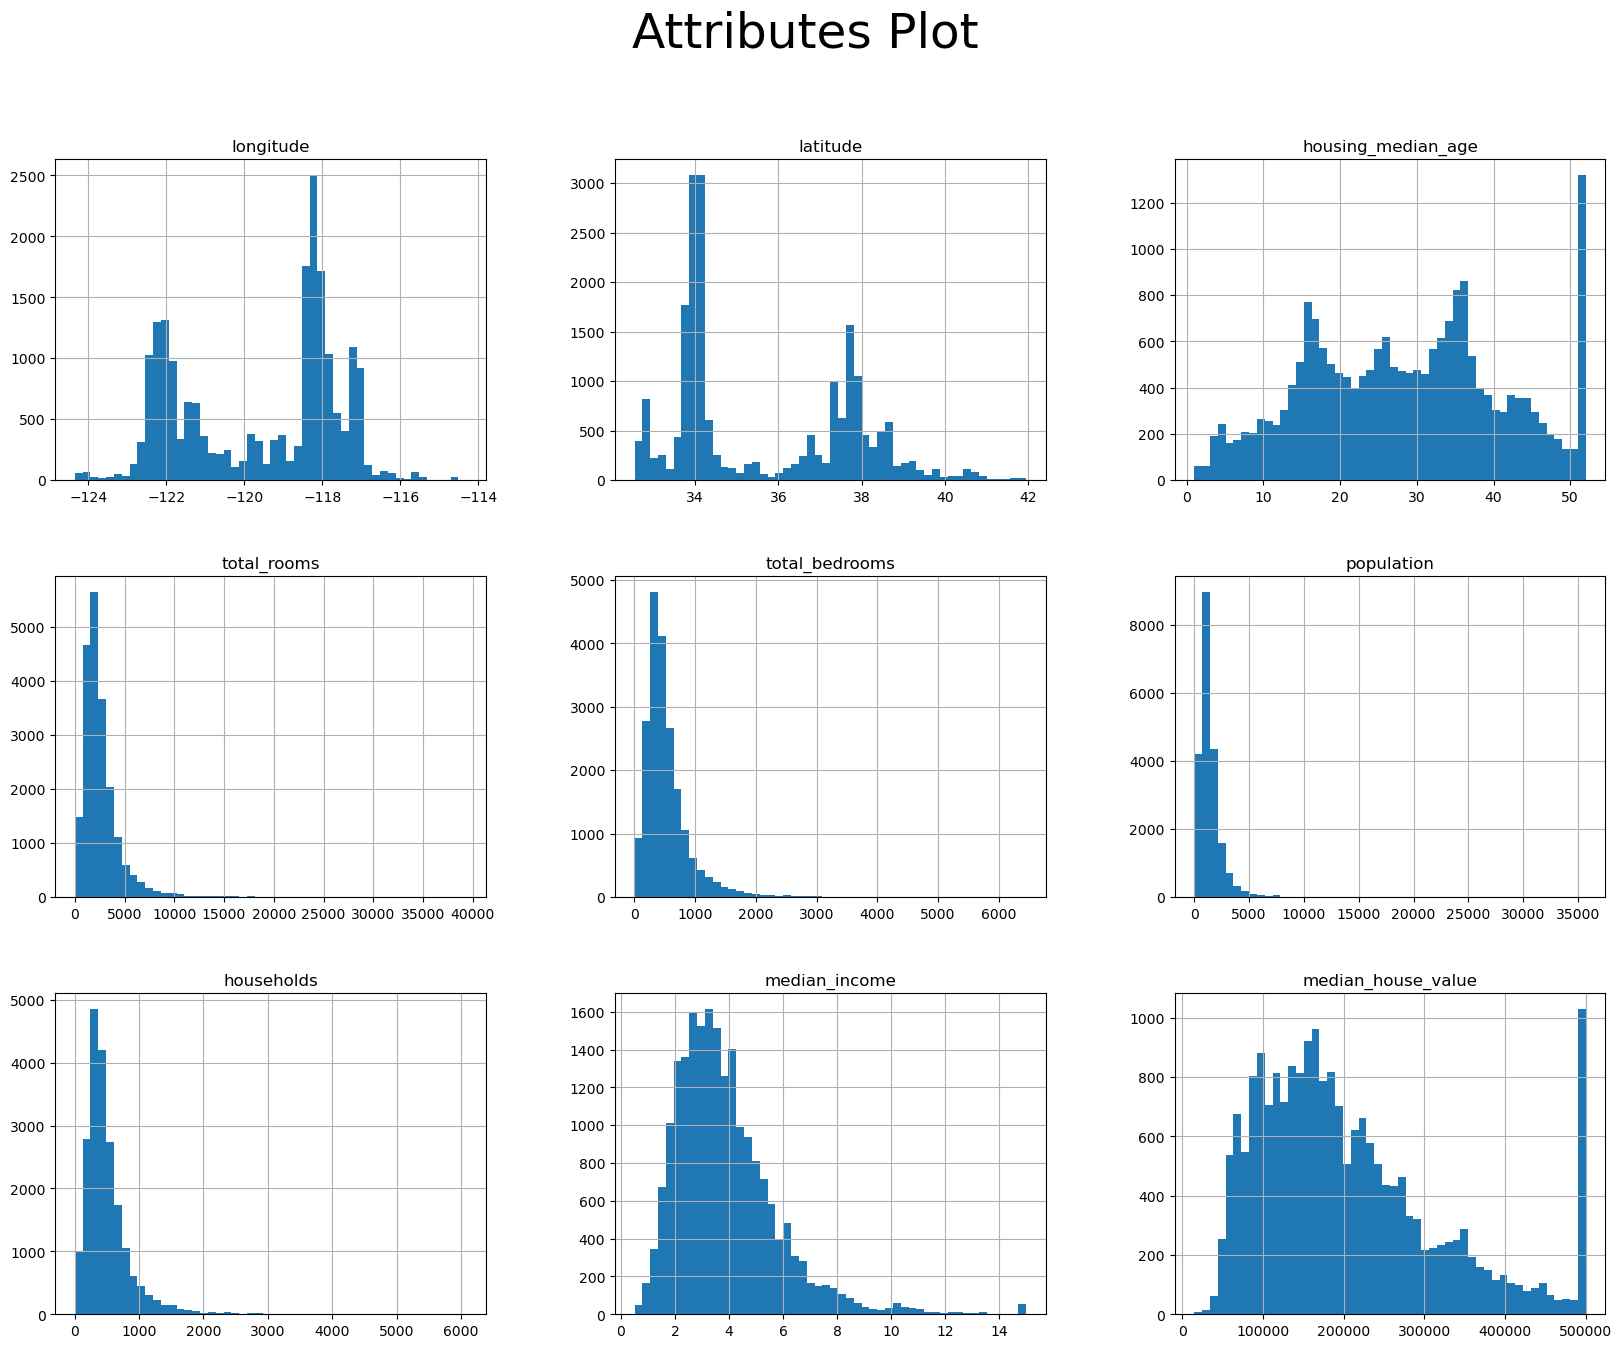

In [7]:
# Plotting the attributes of the dataset
housing.hist(bins=50, figsize=(20,15))
plt.suptitle('Attributes Plot',fontsize=35)
plt.show()

<p style="text-align:left; font-family:newtimeroman;padding-left:10px;padding-right:10px;font-size:110%">The data is scattered to different ranges. We need to scale the data.</p>

In [8]:
# Cor-relation of all the features with median_house_value
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_2724\1817587021.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<p style="text-align:left; font-family:newtimeroman;padding-left:10px;padding-right:10px;font-size:110%">Income seems to have a very noticable effect on the house values.</p>

In [9]:
# arranging the ocean proximity according to no. of houses. 
housing.groupby('ocean_proximity')[['median_house_value']].count().sort_values(ascending=False,by='median_house_value')

,median_house_value
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [10]:
# arranging the ocean proximity according to mean meadian_house_value.
housing.groupby('ocean_proximity').agg( { 'median_house_value': 'mean' } ).sort_values(ascending=False,by='median_house_value')

,median_house_value
ocean_proximity,
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427
<1H OCEAN,240084.285464
INLAND,124805.392001


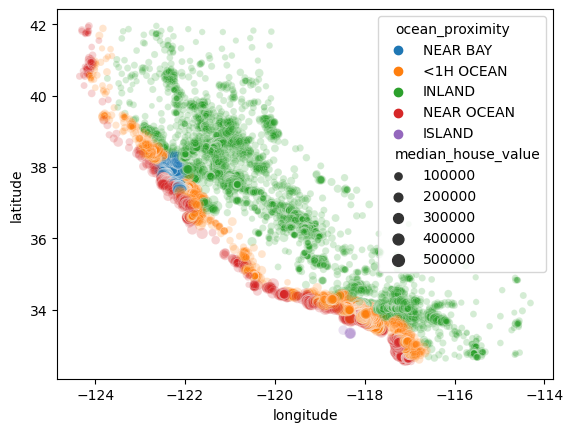

In [11]:
plt.figure(dpi=100)
sns.scatterplot(x='longitude',y='latitude',data=housing,alpha=0.2,size='median_house_value',hue='ocean_proximity')
plt.show()

#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">Creating custom Transformers:</p>

In [12]:
# Custom Evaluation Metric
def rmse(y,y_hat):
    return np.sqrt(mean_squared_error(y,y_hat))

In [13]:
room_ix, bedrooms_ix, population_ix, households_ix= 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room= True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household=X[:,room_ix]/X[:, households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,room_ix]
            return np.c_[X,rooms_per_household,population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">Sampling:</p>

In [14]:
X=housing.drop('median_house_value',axis=1)
y=housing['median_house_value']

In [15]:
X.head() # features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [16]:
y.head() # target

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [17]:
# Sampling
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [18]:
X_train.head() # features of training data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,INLAND
12586,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,INLAND
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND
15456,-117.28,33.18,16.0,3002.0,591.0,842.0,538.0,2.1205,NEAR OCEAN
19798,-123.12,40.54,23.0,1091.0,217.0,539.0,201.0,1.8696,INLAND


In [19]:
y_train.head() # target of training data

13240    191700.0
12586    114300.0
13123    144600.0
15456    157300.0
19798     61500.0
Name: median_house_value, dtype: float64

#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">Pipeline:</p>

In [20]:
# Segregating the features
num_features=["longitude","latitude","housing_median_age","total_rooms",
              "total_bedrooms","population","households","median_income"]
ordinal_features=[]
nominal_features=["ocean_proximity"]
pass_through_cols=[]
drop_cols=[]

In [21]:
# Seperate pipelines for each type of features
num_pipeline=Pipeline([("imputer",SimpleImputer()),
                      ("add attributes",CombinedAttributesAdder()),
                      ("std scaler",StandardScaler())])
nominal_pipeline=Pipeline([("one hot encoding",OneHotEncoder())])

In [22]:
# Pipeline to transform columns
final_pipeline=ColumnTransformer([
    ("numerical pipeline",num_pipeline,num_features),
    ("nominal pipeline",nominal_pipeline,nominal_features)
])

In [23]:
# final columns in order after passing the data through pipeline
output_cols=["longitude","latitude","housing_median_age","total_rooms",
             "total_bedrooms","population","households","median_income",
             "rooms_per_household","population_per_household",
                        "bedrooms_per_room",
            "<1H OCEAN","INLAND","ISLAND","NEAR BAY","NEAR OCEAN"]

In [24]:
X_train.head(3) # training data before transformation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,INLAND
12586,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,INLAND
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND


In [25]:
# Transforming training data
X_train_tr=final_pipeline.fit_transform(X_train)
X_train_tr=pd.DataFrame(X_train_tr,columns=output_cols)

In [26]:
X_train_tr.head(3) # training data after transformation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.943824,-0.704828,-1.086181,0.240758,-0.102708,-0.250026,-0.068377,0.780490,0.487808,-0.059173,-0.846552,0.0,1.0,0.0,0.0,0.0
1,-0.968715,1.359545,0.660456,0.459582,0.347450,0.077362,0.413777,-0.179806,0.043346,-0.070666,-0.390882,0.0,1.0,0.0,0.0,0.0
2,-0.848870,1.237836,-0.689218,-0.601714,-0.736263,-0.640547,-0.733958,0.287061,0.221122,0.016910,-0.588118,0.0,1.0,0.0,0.0,0.0


In [27]:
X_test.head(3) # test data before transformation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3046,-119.28,35.50,34.0,1923.0,379.0,1101.0,351.0,2.4044,INLAND
6803,-118.13,34.08,40.0,1931.0,449.0,1367.0,446.0,2.5750,<1H OCEAN
10112,-117.94,33.94,30.0,1596.0,307.0,845.0,309.0,4.5096,<1H OCEAN


In [28]:
# Transforming training data
X_test_tr=final_pipeline.fit_transform(X_test)
X_test_tr=pd.DataFrame(X_test_tr,columns=output_cols)

In [29]:
X_test_tr.head(3) # test data after transformation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.163564,-0.073360,0.440681,-0.337690,-0.378690,-0.276086,-0.390347,-0.791295,0.030101,0.006279,-0.226410,0.0,1.0,0.0,0.0,0.0
1,0.736657,-0.738667,0.919063,-0.333939,-0.210769,-0.058484,-0.143658,-0.700476,-0.529451,-0.002772,0.251260,1.0,0.0,0.0,0.0,0.0
2,0.831341,-0.804261,0.121759,-0.490999,-0.551410,-0.485508,-0.499410,0.329418,-0.122606,-0.044460,-0.290199,1.0,0.0,0.0,0.0,0.0


#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">Modelling:</p>

In [30]:
# Generating different models
def generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test):
    width = 116
    print("_"*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name", "Train Error", "Test Error", "Train Accuracy", "Test Accuracy"))
    print("_"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(y_train, y_hat_train)
        test_error = rmse(y_test, y_hat_test)
        train_accuracy = r2_score(y_train, y_hat_train)
        test_accuracy = r2_score(y_test, y_hat_test)
        model_name = str(model)
        print(row.format(model_name, train_error, test_error, train_accuracy*100, test_accuracy*100))
        print("-"*width)

In [31]:
models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]

In [32]:
generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|      LinearRegression()      |      68049.17      |      69595.90      |       65.25        |       63.50        |
--------------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |    247600928.87    |    247249643.50    |   -460024484.96    |   -460705551.48    |
--------------------------------------------------------------------------------------------------------------------
|            SVR()             |     118285.86      |     118347.60      |       -4.99        |       -5.55        |
----------------------------------------------------------------

<p style="text-align:left; font-family:newtimeroman;padding-left:10px;padding-right:10px;font-size:110%">Since, RandomForestRegressor() is having the best Test Accuracy, we will proceed with it and find the best hyper-parameters to create the best model.</p>

#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">Hyper-Parameter Tuning:</p>

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# List of different hyperparameters values to find the best combination of hyperparameters
params=[
    {
        "n_estimators": [10, 50, 100, 200, 300, 500], # The number of trees in the forest
        "max_depth": [1, 3, 6, 10], # The maximum depth of the tree
        "min_samples_split": [ 5, 10, 15, 20, 50], # The minimum number of samples required to split an internal node
        "max_features": [ 2, 3, 5, 7] # The number of features to consider when looking for the best split
    }
]

In [35]:
# GridSearchCV object to search over the hyperparameters
grid_search =GridSearchCV(RandomForestRegressor(),param_grid=params,scoring='r2')

In [36]:
# fitting the training data
grid_search.fit(X_train_tr,y_train) 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [1, 3, 6, 10],
                          'max_features': [2, 3, 5, 7],
                          'min_samples_split': [5, 10, 15, 20, 50],
                          'n_estimators': [10, 50, 100, 200, 300, 500]}],
             scoring='r2')

In [37]:
# Best model trained
best_model=grid_search.best_estimator_
print(best_model)

RandomForestRegressor(max_depth=10, max_features=7, min_samples_split=5,
                      n_estimators=500)


In [38]:
# Best hyperparamters
best_param=grid_search.best_params_
print(best_param)

{'max_depth': 10, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 500}


In [39]:
# Accuracy in percentage 
acc=grid_search.best_score_
print(acc*100) 

79.56164130333069


In [40]:
# Using the best model to make predictions on the test data
final_predictions=best_model.predict(X_test_tr)

In [41]:
# Root Mean Squared Error
final_rmse=np.sqrt(mean_squared_error(y_test,final_predictions))
print(final_rmse) 

53201.92277616555


In [43]:
# Testing with custom input
test=pd.DataFrame([[-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,"INLAND"]], columns=num_features + nominal_features)
test_tr=final_pipeline.transform(test) # tranforming data
predict=best_model.predict(test_tr) # predicting with best model
print(predict)

[206893.50795733]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


`test` is a sample data whose original housing price is: `191700.0`<br><br>
Prediction of ML Model: `207177.60521425`</p>

#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">Conclusion:</p>

<p style="text-align:left; font-family:newtimeroman;padding-left:10px;padding-right:10px;font-size:110%">After training different models we find that RandomForestRegressor has the best test accuracy, so we proceed with the models to find the best combination of hyper-parameters to increase the prediction accuracy.<br>After training altmost 480 models we find the best model that gives the accuracy of 79.56.<br>Also we tested the model with custom data to predict the housing price.</p>

#### <p style="background-color:#068FFF; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 5px 5px;padding-left:50px;padding:10px">References:</p>

* Hands–On Machine Learning with Scikit–Learn and TensorFlow by Aurélien Géron
* Kaggle